In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MIN_RBE    LAT_Y    LON_X
0      M_001_B_II     II  1996-01-01           4.2 -22.4953 -69.9044
1      M_001_B_II     II  1996-01-02           4.8 -22.4953 -69.9044
2      M_001_B_II     II  1996-01-03           4.0 -22.4953 -69.9044
3      M_001_B_II     II  1996-01-04           5.6 -22.4953 -69.9044
4      M_001_B_II     II  1996-01-05           3.5 -22.4953 -69.9044
...           ...    ...         ...           ...      ...      ...
81747    M_225_AA     II  2011-01-07          15.4 -23.4330 -70.4500
81748    M_225_AA     II  2011-01-20          14.5 -23.4330 -70.4500
81749    M_225_AA     II  2011-05-01          12.8 -23.4330 -70.4500
81750    M_225_AA     II  2011-09-08           9.1 -23.4330 -70.4500
81751    M_225_AA     II  2011-11-18          15.3 -23.4330 -70.4500

[81752 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMII.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MIN_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMII.csv', index=False)

archivo_csv2 = "VMTMII.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_B_II  M_002_B_II  M_006_A_II  M_009_A_II  M_013_A_II  M_015_A_II  \
0            4.2        18.4        -1.5        -3.2         7.5         0.4   
1            4.8        18.3        -1.2        -2.8         8.9         1.5   
2            4.0        19.2        -1.8        -3.0         NaN        -0.1   
3            5.6        16.2        -2.1        -2.9         NaN         0.2   
4            3.5        17.0        -3.1        -2.7         NaN        -0.2   
...          ...         ...         ...         ...         ...         ...   
6183        -3.0        16.2         NaN         NaN         NaN         NaN   
6184        -1.6        15.4         NaN         NaN         NaN         NaN   
6185        -1.2        17.1         NaN         NaN         NaN         NaN   
6186        -0.8        17.6         NaN         NaN         NaN         NaN   
6187        -4.6        15.7         NaN         NaN         NaN         NaN   

      M_017_A_II  M_020_A_II  M_022_A_I

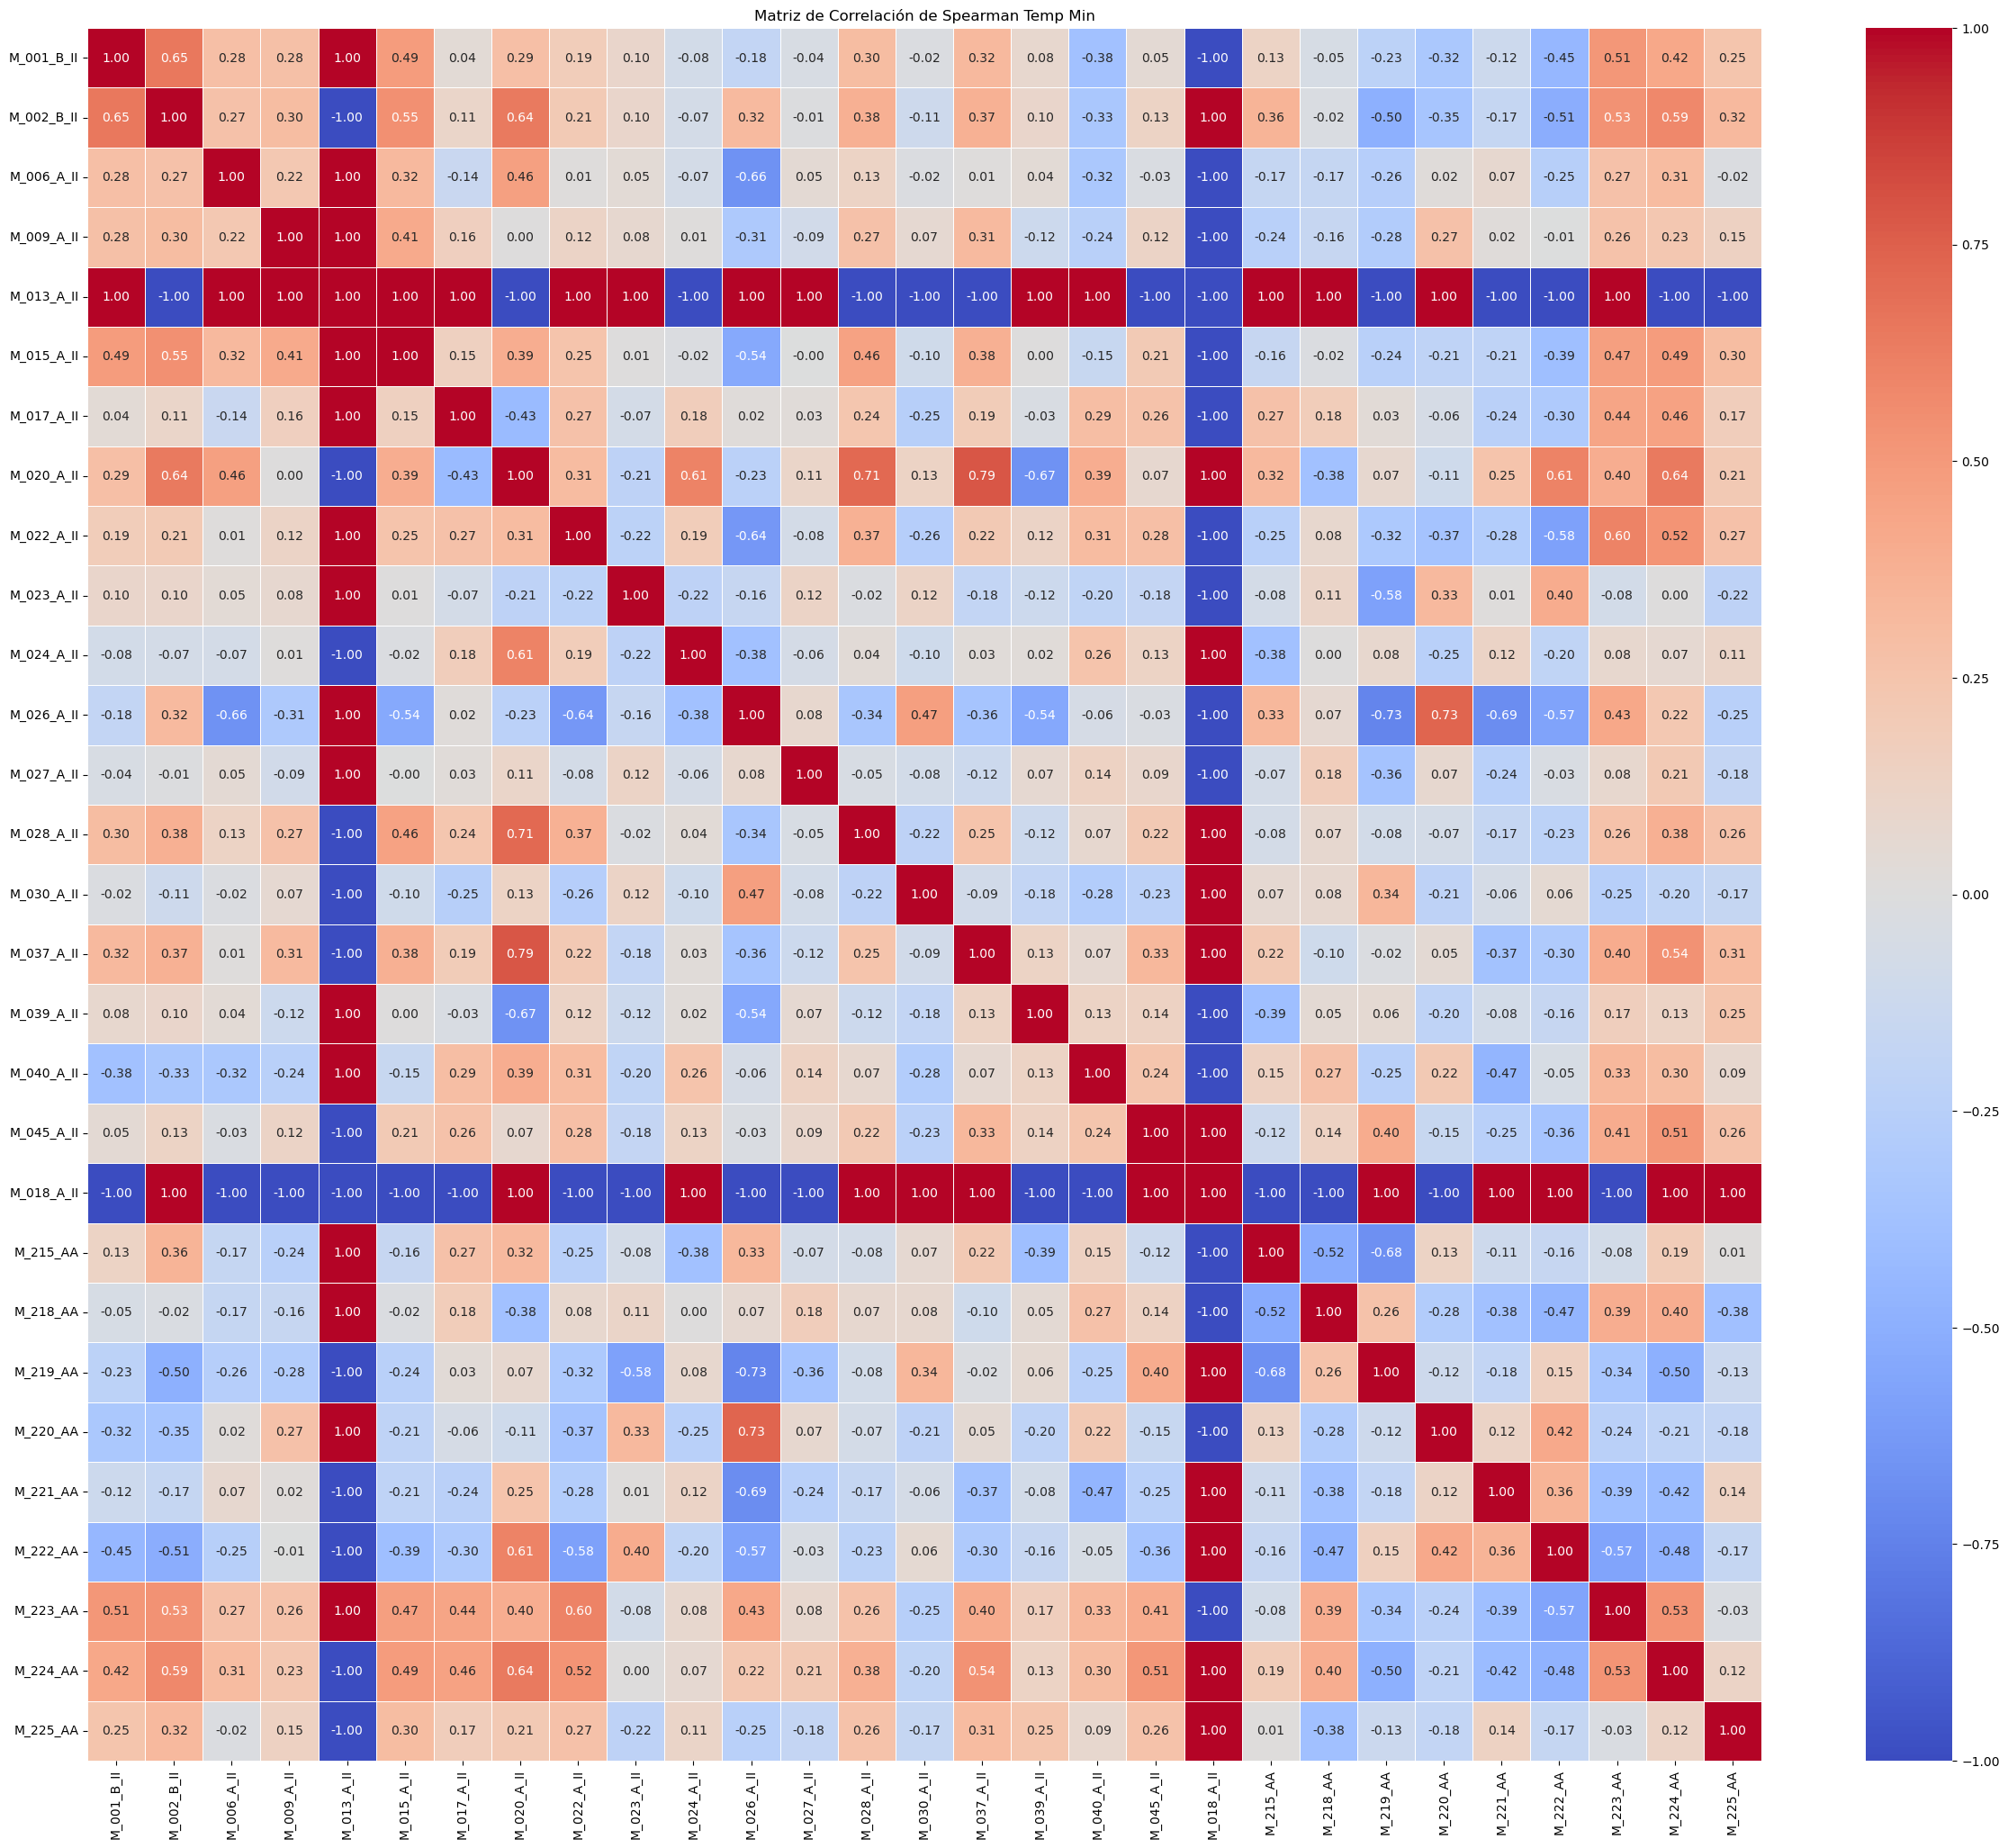

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min")
plt.show()

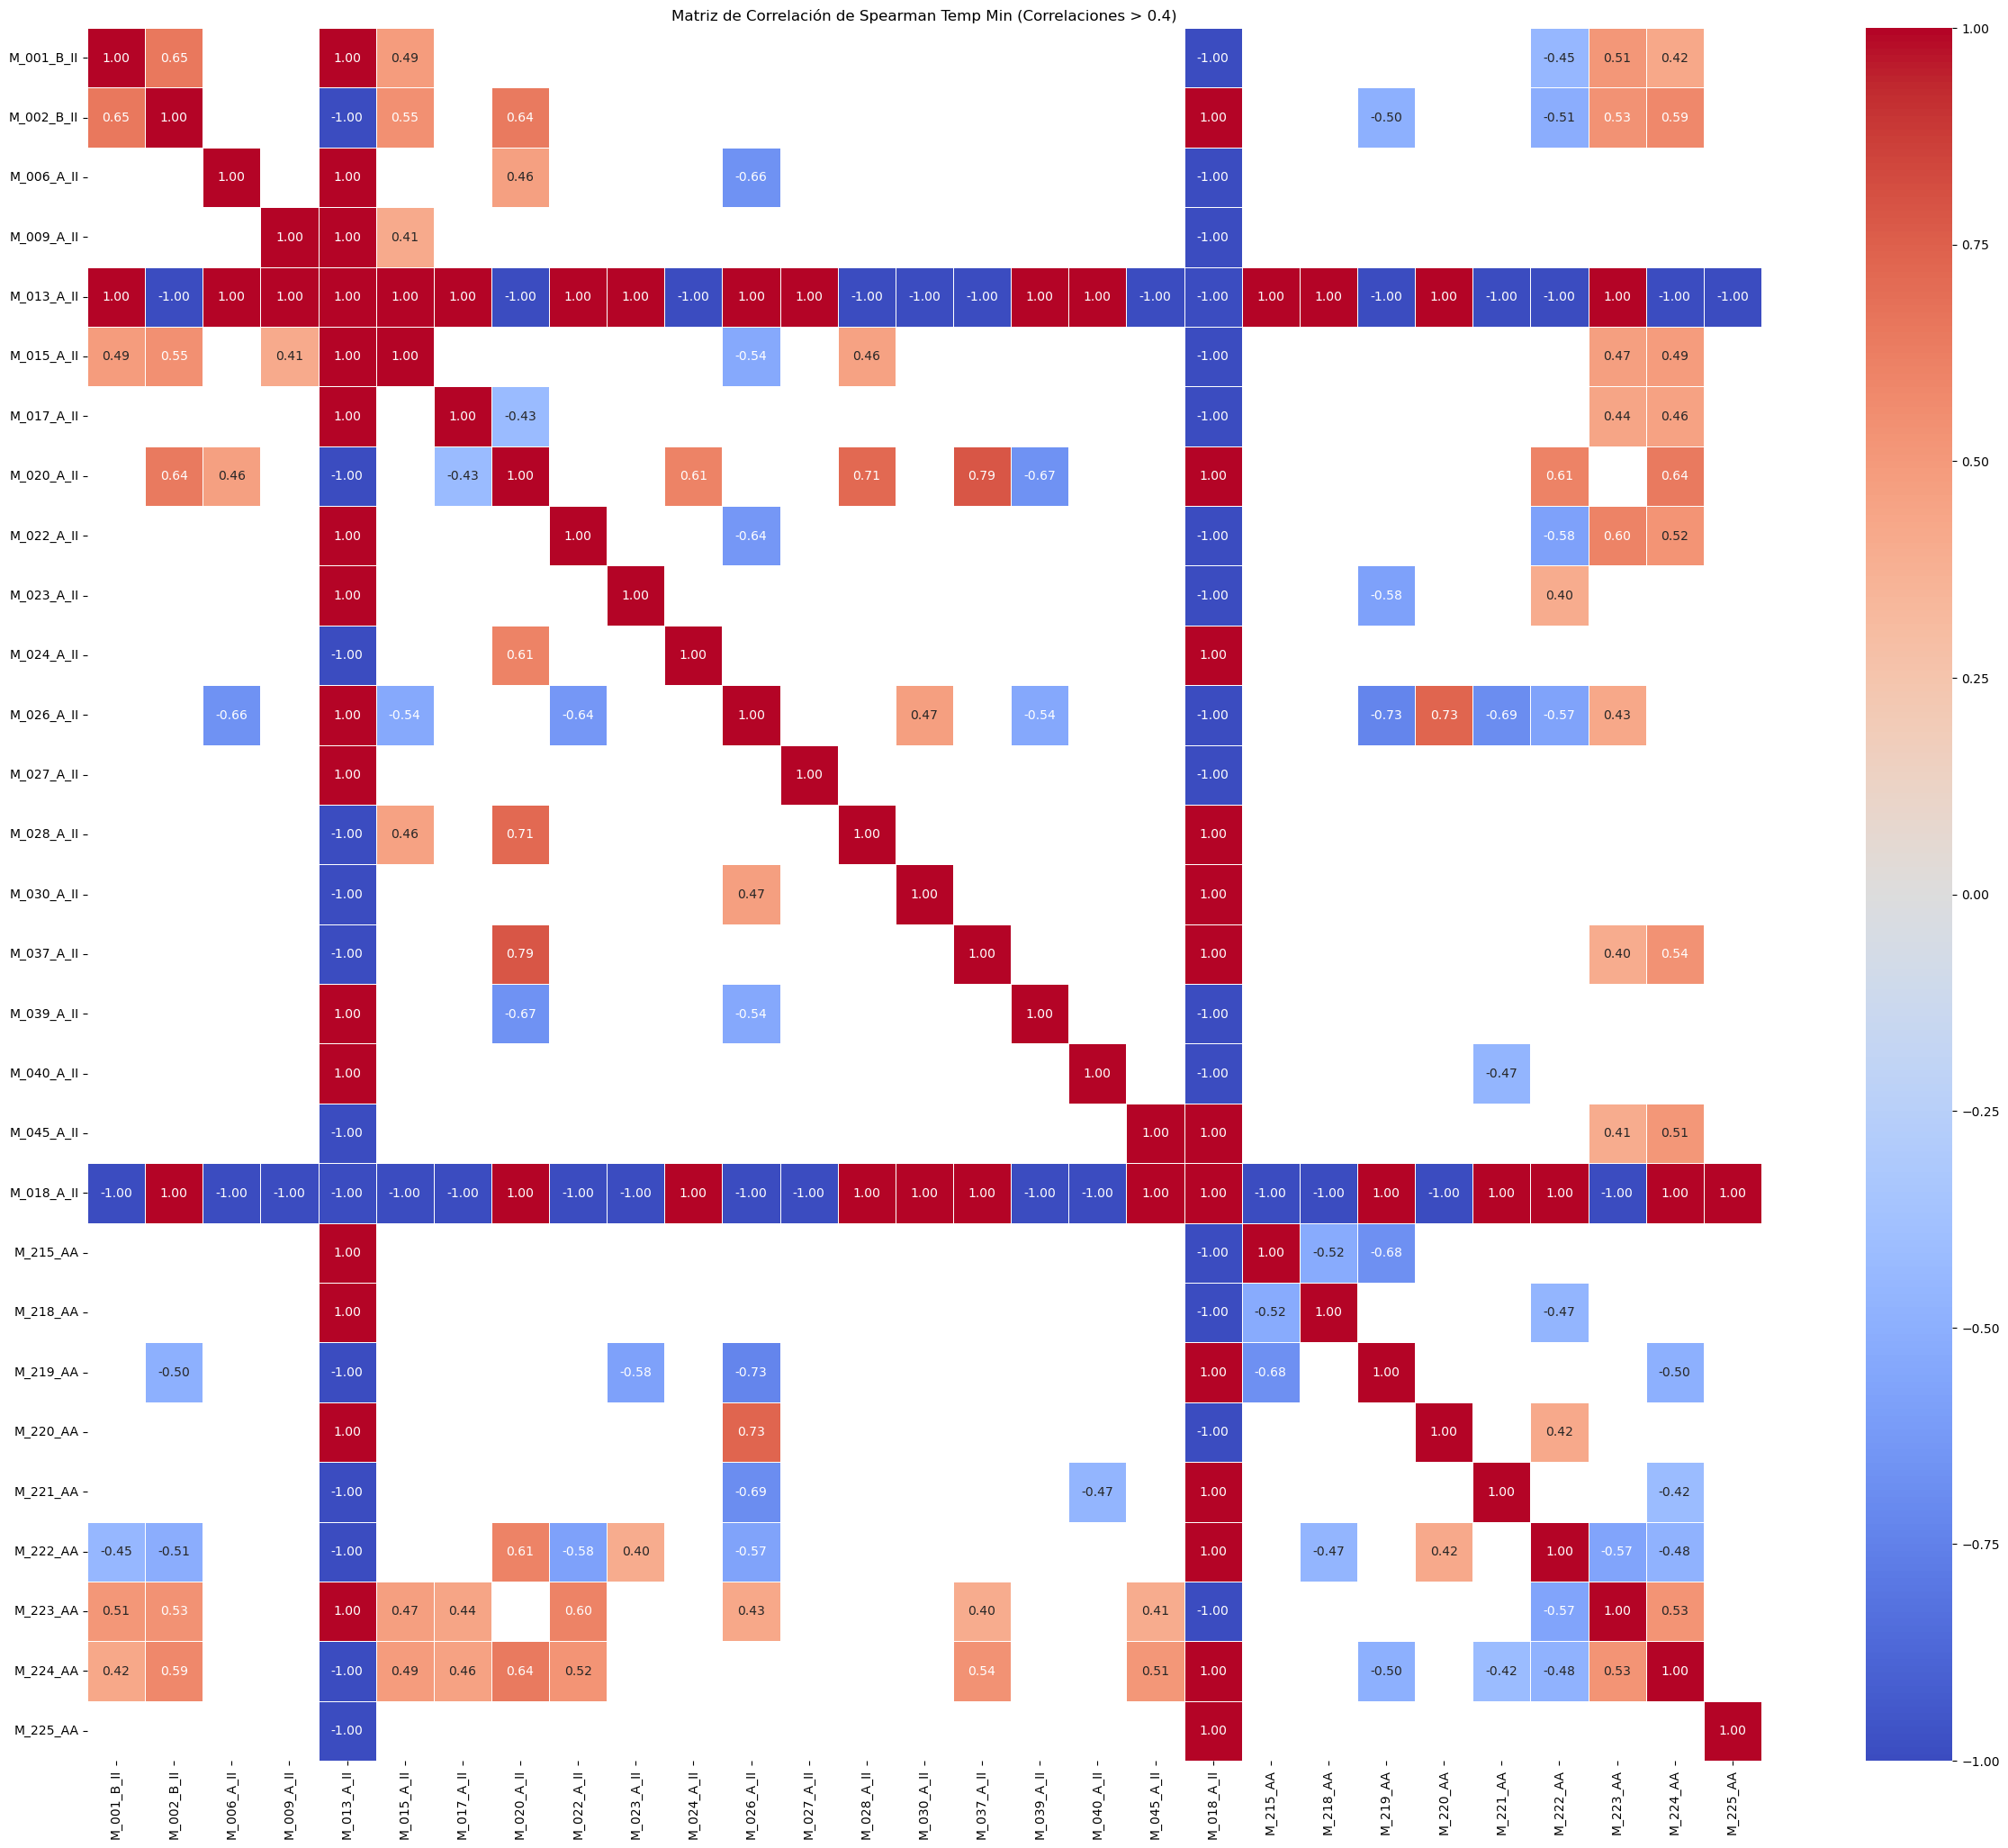

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min (Correlaciones > 0.4)")
plt.show()

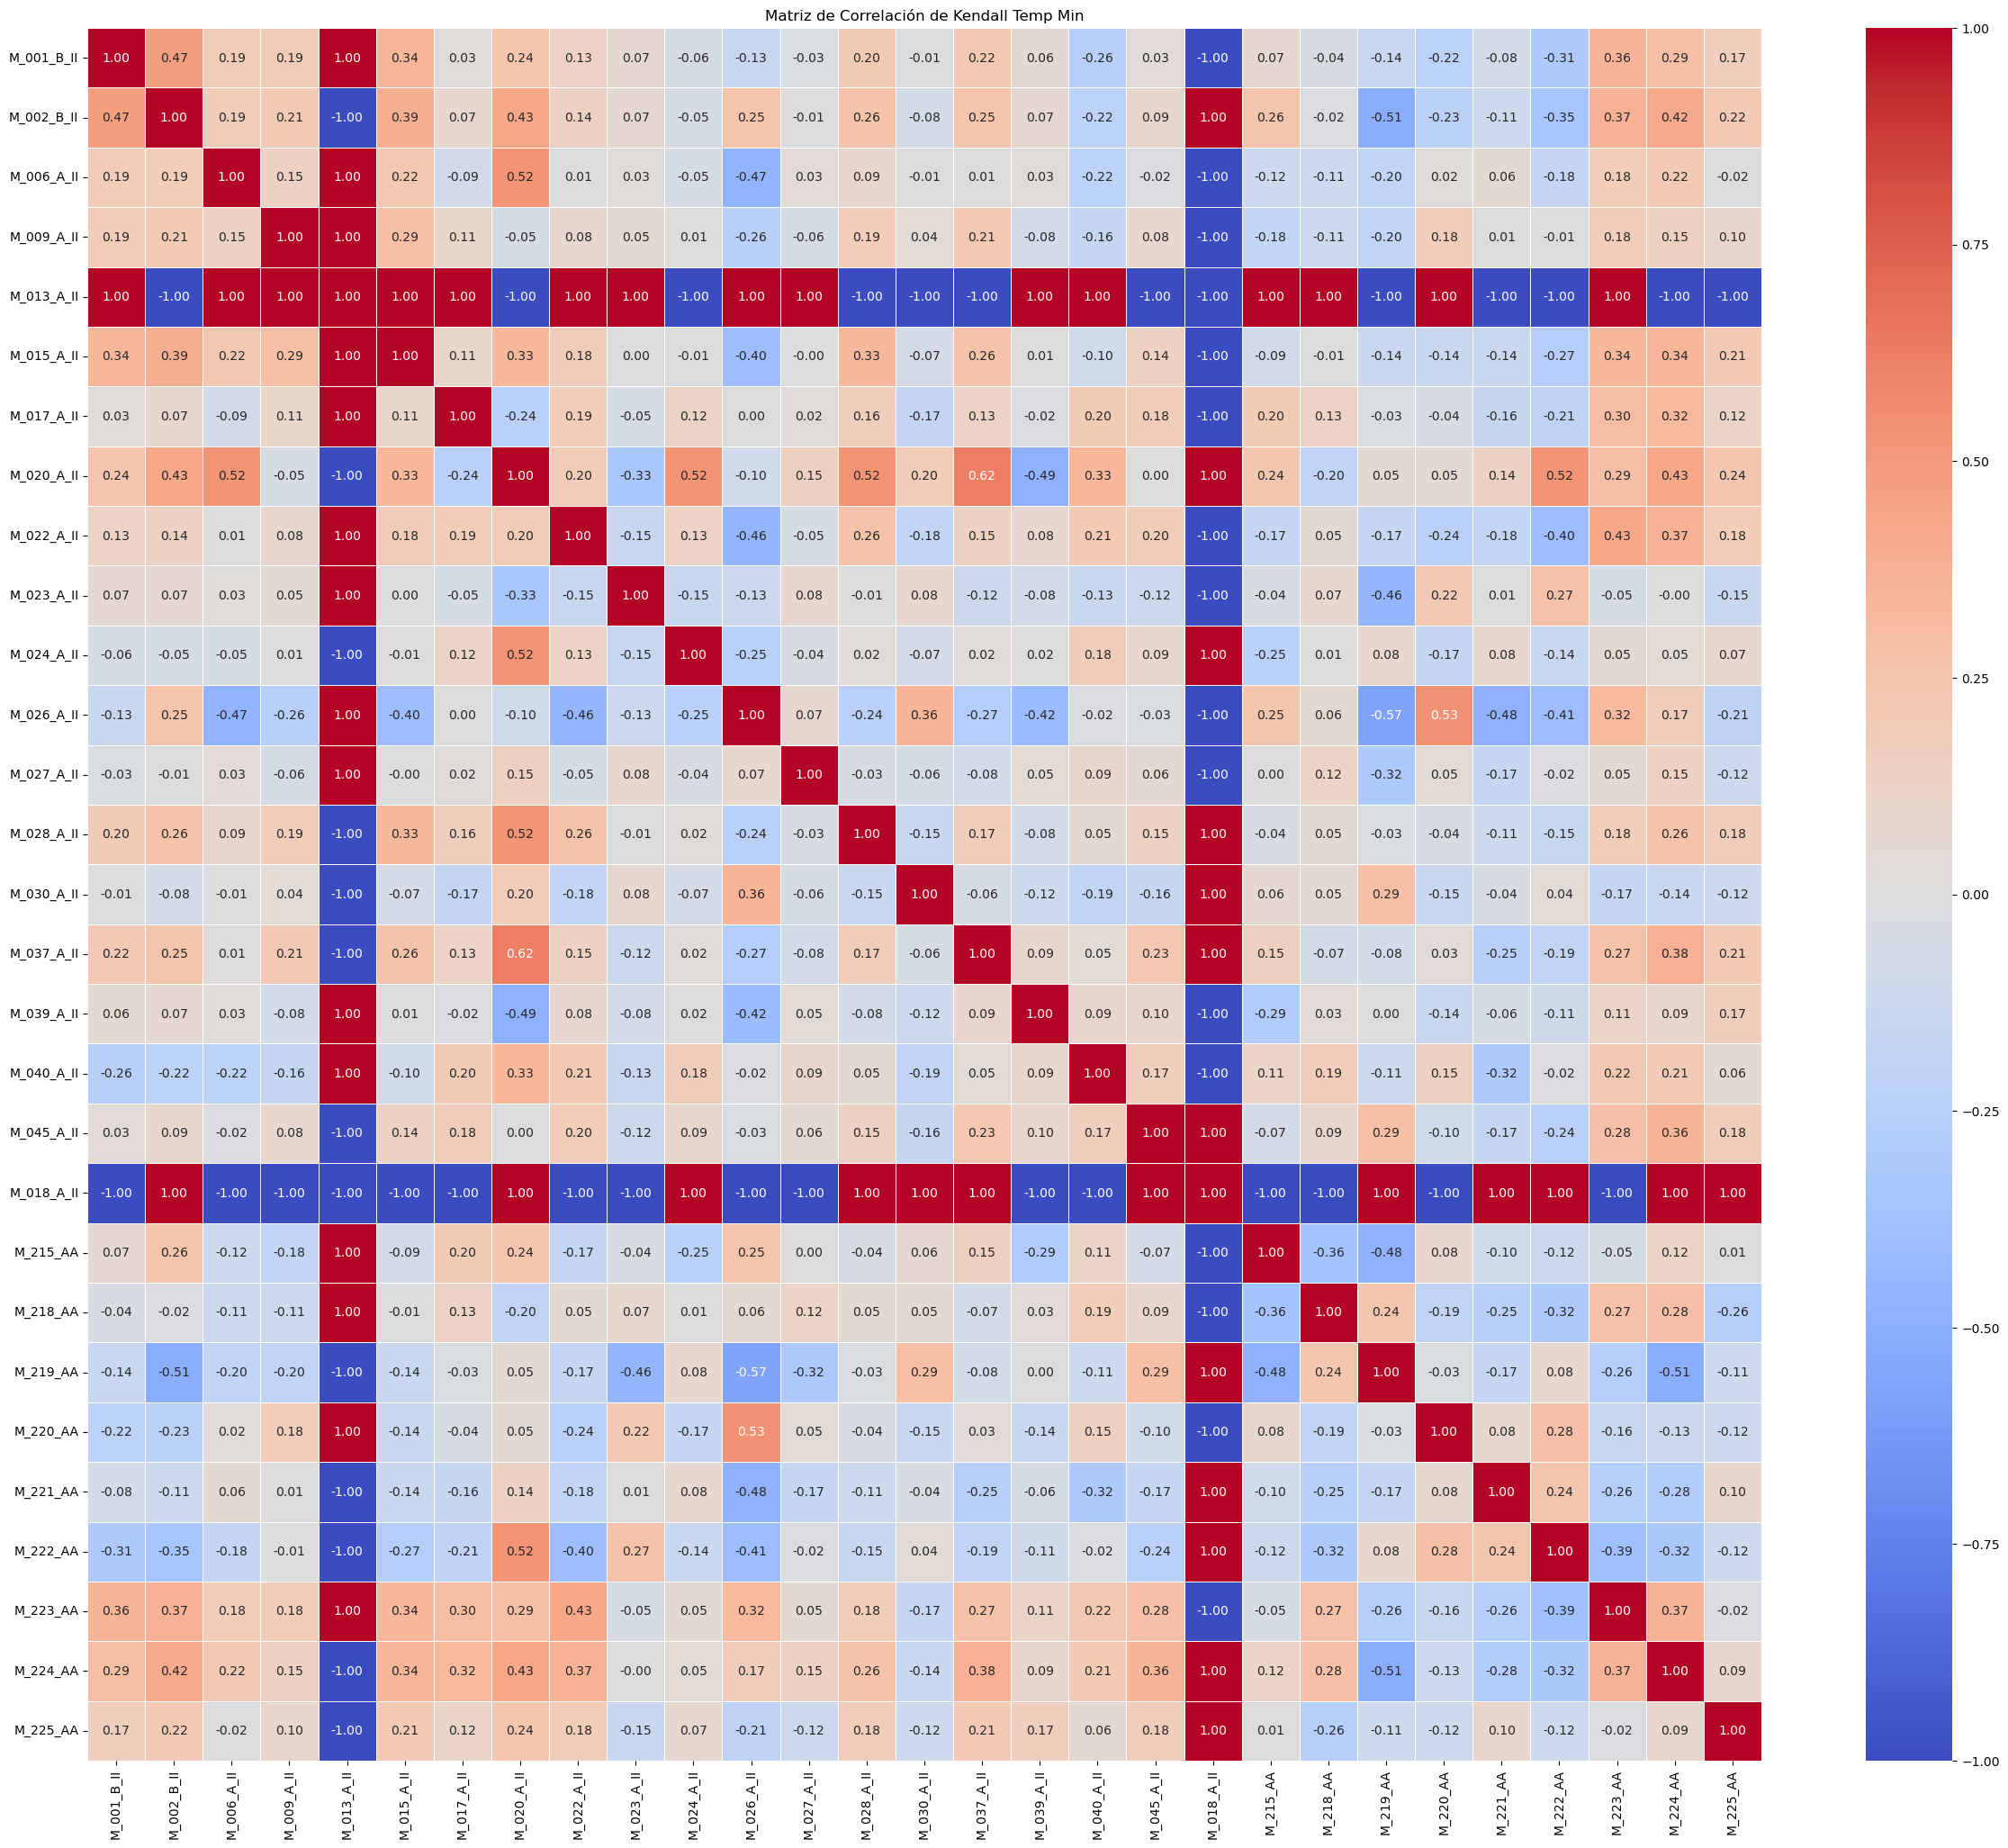

In [5]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Min")
plt.show()

In [1]:
import pandas as pd
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_015_A_II', 'M_006_A_II', 'M_009_A_II', 'M_022_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_006_A_II  M_009_A_II  M_015_A_II  M_022_A_II
ID_CIDERH                                                 
M_006_A_II    1.000000    0.633302    0.818234    0.692704
M_009_A_II    0.633302    1.000000    0.698395    0.574045
M_015_A_II    0.818234    0.698395    1.000000    0.722167
M_022_A_II    0.692704    0.574045    0.722167    1.000000


NameError: name 'sns' is not defined

In [2]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMII.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_II.html')

ID_CIDERH   M_022_A_II  M_023_A_II  M_024_A_II  M_027_A_II
ID_CIDERH                                                 
M_022_A_II    1.000000    0.422731    0.487537    0.451025
M_023_A_II    0.422731    1.000000    0.338776    0.563389
M_024_A_II    0.487537    0.338776    1.000000    0.430108
M_027_A_II    0.451025    0.563389    0.430108    1.000000


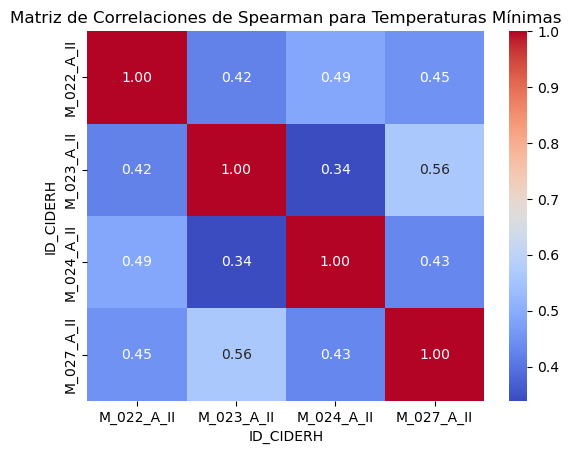

In [16]:
import pandas as pd
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_023_A_II', 'M_022_A_II', 'M_027_A_II', 'M_024_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_009_A_II  M_015_A_II  M_017_A_II  M_215_AA
ID_CIDERH                                               
M_009_A_II    1.000000    0.698395    0.567597  0.771205
M_015_A_II    0.698395    1.000000    0.670899  0.826974
M_017_A_II    0.567597    0.670899    1.000000  0.892645
M_215_AA      0.771205    0.826974    0.892645  1.000000


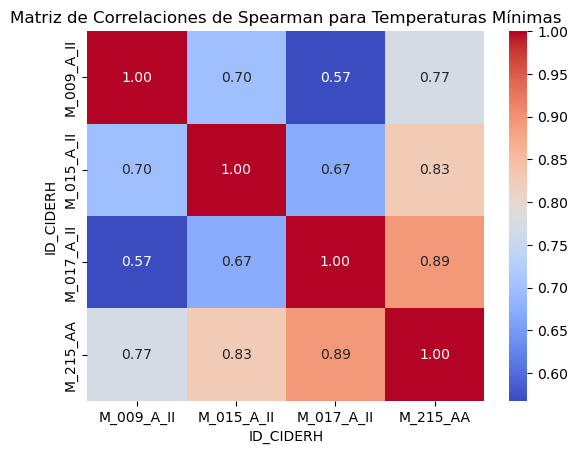

In [13]:
archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_017_A_II', 'M_009_A_II', 'M_015_A_II', 'M_215_AA']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_009_A_II  M_015_A_II  M_024_A_II  M_215_AA
ID_CIDERH                                               
M_009_A_II    1.000000    0.698395    0.310120  0.771205
M_015_A_II    0.698395    1.000000    0.321526  0.826974
M_024_A_II    0.310120    0.321526    1.000000  0.812489
M_215_AA      0.771205    0.826974    0.812489  1.000000


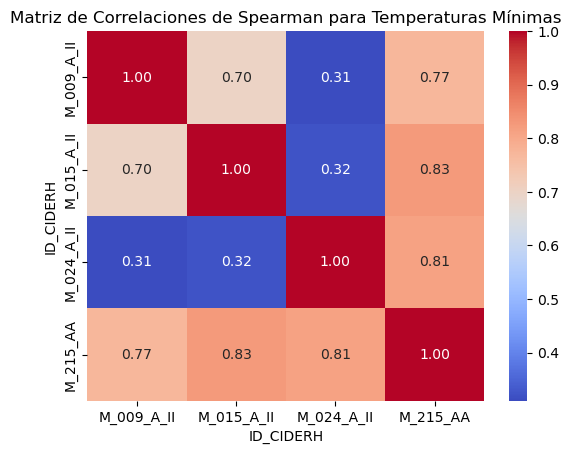

In [21]:
archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_024_A_II', 'M_009_A_II', 'M_015_A_II', 'M_215_AA']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_009_A_II  M_015_A_II  M_017_A_II  M_215_AA
ID_CIDERH                                               
M_009_A_II    1.000000    0.698395    0.567597  0.771205
M_015_A_II    0.698395    1.000000    0.670899  0.826974
M_017_A_II    0.567597    0.670899    1.000000  0.892645
M_215_AA      0.771205    0.826974    0.892645  1.000000


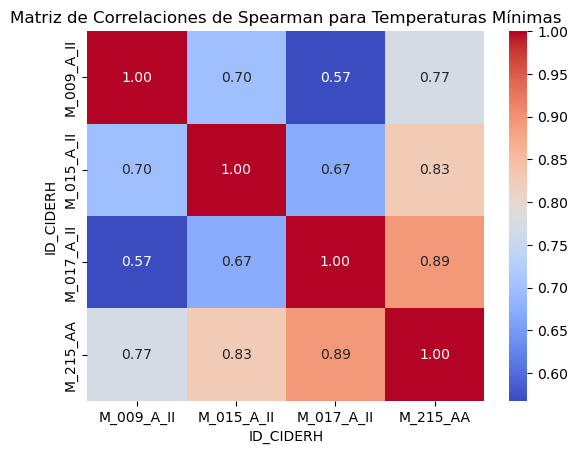

In [22]:
archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_017_A_II', 'M_215_AA', 'M_015_A_II', 'M_009_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()